In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [27]:
X=data[['CO','NOX']]
y=data['PM10']

In [28]:
split_index= int(len(data)*0.8)

In [29]:
X_train=X.iloc[:split_index]
X_test= X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
coeficiente=pd.DataFrame({'variable':X.columns,'coeficientes':model.coef_})

In [34]:
print(coeficiente)

  variable  coeficientes
0       CO      -4.42238
1      NOX       0.74793


In [35]:
print(f"Intercepto:{model.intercept_}")

Intercepto:15.394050316557077


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
r2=r2_score(y_test,y_pred)
r2

0.4051483156923722

In [39]:
import numpy as np
rmse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(rmse)
rmse

np.float64(11.015555045398493)

In [40]:
mae=mean_absolute_error(y_test, y_pred)
mae

8.77187127970108

In [41]:
y_pred

array([35.84322788, 35.16986591, 27.93741429, 36.63817377, 41.13384142,
       41.06242395, 42.75638277, 44.17721444, 41.37719193, 25.82155189,
       29.04508134, 29.73548446, 32.63938451, 33.26152794, 37.54453601,
       31.04669963, 32.62612718, 42.79223458, 44.49395668, 46.49808759,
       44.54137796, 39.69857864, 29.54418195, 25.75107461, 40.48770376,
       43.21548707, 40.28825791, 30.60020619, 33.59204026, 36.88470139,
       31.9400362 , 51.05169762, 46.68372588, 40.86591425, 49.42332902,
       46.26082727, 47.17695499, 39.32150203, 41.74288829, 41.65078904,
       54.44211195, 48.85309131, 43.87679743, 44.1830246 , 33.8194889 ,
       42.91702292, 44.68183935, 50.51921234, 46.307285  , 41.39198454,
       32.1379949 , 31.89452241, 35.88945277, 54.38695419, 53.14398519,
       50.37495549, 33.42907716, 37.13424237, 35.02935838, 33.6375235 ,
       34.46112397, 47.26249987, 48.58843081, 35.47889646, 49.67038674,
       39.44255202, 39.29978144, 53.18432663, 51.63623227, 49.73

In [42]:
from matplotlib import pyplot as plt

In [43]:
residuos= y_test- y_pred

Text(0, 0.5, 'Frecuencia')

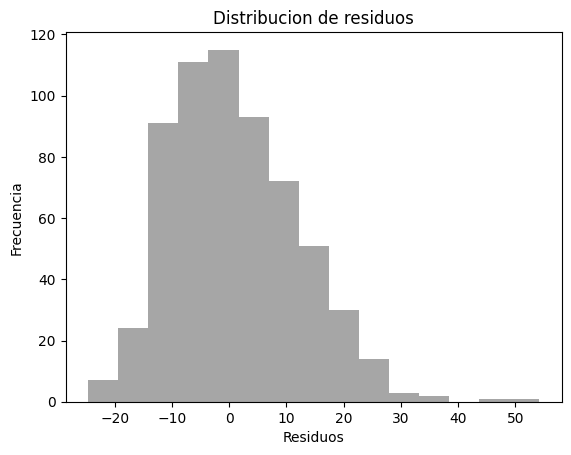

In [44]:
plt.hist(residuos, bins=15, color='gray', alpha=0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

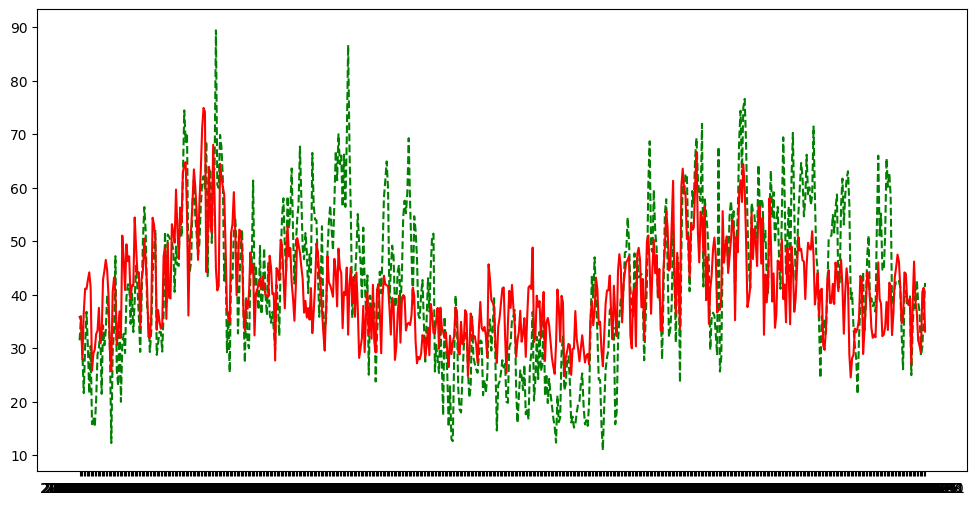

In [45]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

In [46]:
X=data[['CO','NOX','PM25','SO2']]
y=data['PM10']

In [47]:
split_index= int(len(data)*0.8)

In [48]:
X_train=X.iloc[:split_index]
X_test= X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [49]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred=model.predict(X_test)

In [51]:
coeficiente=pd.DataFrame({'variable':X.columns,'coeficientes':model.coef_})
coeficiente

,variable,coeficientes
0,CO,-21.240472
1,NOX,0.530047
2,PM25,1.341258
3,SO2,0.122226


In [52]:
print(f"Intercepto:{model.intercept_}")

Intercepto:2.542471488012616


In [53]:
r2=r2_score(y_test,y_pred)
r2

0.7494314866330515

In [54]:
import numpy as np
rmse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(rmse)
rmse

np.float64(7.149329038511094)

In [55]:
mae=mean_absolute_error(y_test, y_pred)
mae

5.463133609444374

In [56]:
residuos= y_test- y_pred

Text(0, 0.5, 'Frecuencia')

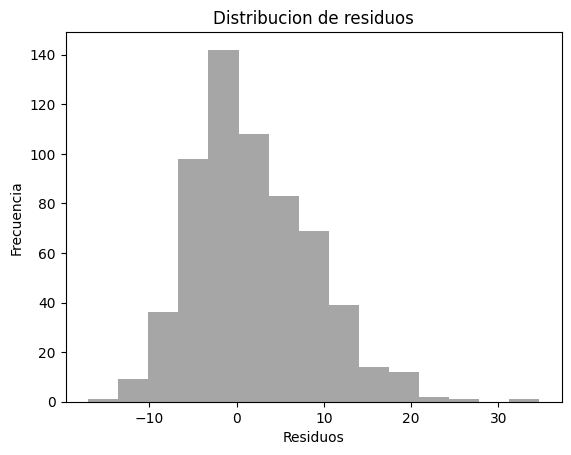

In [57]:
plt.hist(residuos, bins=15, color='gray', alpha=0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

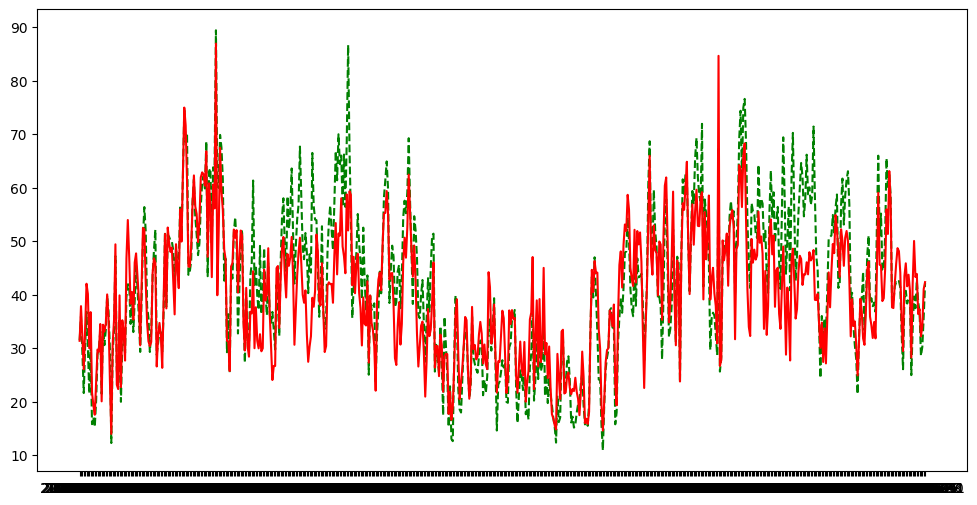

In [58]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [73]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [74]:
rf_model=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [75]:
y_pred=rf_model.predict(X_test)

In [76]:
y_pred

array([28.88732769, 36.89959766, 33.02526754, 23.91107727, 31.83564405,
       38.32415473, 37.07564616, 31.19183875, 34.49386289, 24.8293755 ,
       19.04664864, 17.22562146, 23.66365344, 29.79699895, 26.0536494 ,
       37.98739288, 20.67003393, 34.39741255, 33.4860101 , 34.6827887 ,
       35.66098532, 31.07730372, 25.08222895, 14.55978023, 26.72487049,
       34.37582788, 52.61109496, 23.74800523, 20.69457046, 38.02812173,
       23.20074967, 35.58465697, 34.35234663, 23.29143954, 43.59994021,
       51.62207981, 44.70624945, 37.48101032, 38.4449868 , 31.31021658,
       46.2884486 , 43.94614071, 39.00842244, 35.337997  , 27.53095287,
       37.13844747, 48.55619297, 50.30704694, 41.32610217, 27.63345022,
       30.25127585, 29.68930879, 26.285591  , 45.91498098, 46.57012667,
       44.33759957, 24.72631036, 29.58269647, 31.42532596, 30.52532577,
       24.78046821, 39.56246673, 48.71286376, 36.8444688 , 49.31841286,
       51.49569474, 47.65053658, 46.96971278, 42.49015189, 35.17